## load data

In [1]:
import pandas as pd

In [2]:
df_raw = pd.read_csv("./compas-scores-two-years.csv")

In [3]:
df_raw.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [4]:
df_raw['c_jail_time'] = (pd.to_datetime(df_raw['c_jail_out']) - pd.to_datetime(df_raw['c_jail_in'])).dt.days

In [5]:
cols_interest = ['id', 'age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 
                 'priors_count', 'days_b_screening_arrest', 'decile_score', 'is_recid', 
                 'c_jail_in', 'c_jail_out', 'c_jail_time', 'two_year_recid']
df = df_raw[cols_interest]
df.shape

(7214, 15)

## follow same filtering process as ProPublica analysis

In [6]:
df = df[df['is_recid'] != -1]
df.shape

(7214, 15)

In [7]:
df = df[df['c_charge_degree'] != 'O']
df.shape

(7214, 15)

In [8]:
df = df[df['score_text'] != 'N/A']
df.shape

(7214, 15)

In [9]:
df = df[df['days_b_screening_arrest'].abs() <= 30]
df.shape

(6172, 15)

In [10]:
df.head()

,id,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,c_jail_in,c_jail_out,c_jail_time,two_year_recid
0,1,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,2013-08-13 06:03:42,2013-08-14 05:41:20,0.0,0
1,3,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,2013-01-26 03:45:27,2013-02-05 05:36:53,10.0,1
2,4,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,2013-04-13 04:58:34,2013-04-14 07:02:04,1.0,1
5,7,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,2013-11-30 04:50:18,2013-12-01 12:28:56,1.0,0
6,8,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,2014-02-18 05:08:24,2014-02-24 12:18:30,6.0,1


## encode categorical features

In [11]:
df = df.drop(['c_jail_in', 'c_jail_out'], axis=1)

In [12]:
df_enc = pd.get_dummies(df, prefix_sep=':')
df_enc.columns = df_enc.columns.str.replace(' ', '_')

In [13]:
df_enc

,id,age,priors_count,days_b_screening_arrest,decile_score,is_recid,c_jail_time,two_year_recid,c_charge_degree:F,c_charge_degree:M,...,race:Native_American,race:Other,age_cat:25_-_45,age_cat:Greater_than_45,age_cat:Less_than_25,score_text:High,score_text:Low,score_text:Medium,sex:Female,sex:Male
0,1,69,0,-1.0,1,0,0.0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,3,34,0,-1.0,3,1,10.0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
2,4,24,4,-1.0,4,1,1.0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
5,7,44,0,0.0,1,0,1.0,0,0,1,...,0,1,1,0,0,0,1,0,0,1
6,8,41,14,-1.0,6,1,6.0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,23,0,-1.0,7,0,1.0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
7210,10997,23,0,-1.0,3,0,1.0,0,1,0,...,0,0,0,0,1,0,1,0,0,1
7211,10999,57,0,-1.0,1,0,1.0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
7212,11000,33,3,-1.0,2,0,1.0,0,0,1,...,0,0,1,0,0,0,1,0,1,0


In [14]:
from imodels import RuleFitClassifier, BoostedRulesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, plot_roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [23]:
m = BoostedRulesClassifier()
X, y = df_enc.drop(['id', 'two_year_recid', 'is_recid'], axis=1), df_enc['is_recid']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
m.fit(X_train, y_train)

BoostedRulesClassifier()

In [25]:
score = m.predict_proba(X_test)[:, 1]
pred = m.predict(X_test)

print(roc_auc_score(y_test, score))
print(accuracy_score(y_test, pred))
print(average_precision_score(y_test, score))

0.724475483262612
0.659753726506805
0.685871615973056


In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, score)

(0.0, 1.0)

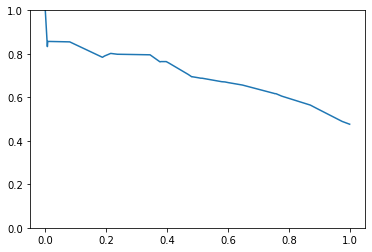

In [27]:
plt.plot(recall, precision)
plt.ylim(0, 1)

In [28]:
# roc_curve(y_test, score)

In [29]:
for rule, rule_score in m.rules_:
    print(rule, rule_score)

feature_3 <= 5.5 [-0.08453243778272539]
feature_3 > 5.5 [0.13254872029910064]
feature_1 <= 1.5 [-0.03274765456860088]
feature_1 > 1.5 [0.07041165041322682]
feature_0 <= 30.5 [0.036740248054051676]
feature_0 > 30.5 [-0.00990603969179694]
feature_20 <= 0.5 [-0.015215451921728365]
feature_20 > 0.5 [0.01831947370092483]
feature_0 <= 20.5 [0.012798602299924685]
feature_0 > 20.5 [-0.00021814032221056828]
feature_0 <= 20.5 [0.015272271139738475]
feature_0 > 20.5 [-0.015272271139738475]
feature_0 <= 20.5 [0.013712906591464378]
feature_0 > 20.5 [-0.0004185711578822908]
feature_1 <= 6.5 [-0.00036663001741111303]
feature_1 > 6.5 [0.009385188307245612]
feature_0 <= 20.5 [0.02749122175478441]
feature_0 > 20.5 [-0.02749122175478441]
feature_0 <= 20.5 [0.011657116811084275]
feature_0 > 20.5 [-0.0003495465877237041]


In [30]:
X.columns

Index(['age', 'priors_count', 'days_b_screening_arrest', 'decile_score',
       'c_jail_time', 'c_charge_degree:F', 'c_charge_degree:M',
       'race:African-American', 'race:Asian', 'race:Caucasian',
       'race:Hispanic', 'race:Native_American', 'race:Other',
       'age_cat:25_-_45', 'age_cat:Greater_than_45', 'age_cat:Less_than_25',
       'score_text:High', 'score_text:Low', 'score_text:Medium', 'sex:Female',
       'sex:Male'],
      dtype='object')

In [31]:
false_pos = X_test[(m.predict(X_test) > 0.5) & (y_test == 0)]

In [32]:
false_pos.describe().iloc[:, 7:13]

,race:African-American,race:Asian,race:Caucasian,race:Hispanic,race:Native_American,race:Other
count,177.000000,177.0,177.000000,177.000000,177.000000,177.000000
mean,0.627119,0.0,0.248588,0.090395,0.005650,0.028249
std,0.484943,0.0,0.433420,0.287561,0.075165,0.166152
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [33]:
false_neg = X_test[(m.predict(X_test) < 0.5) & (y_test > 0.5)]

In [34]:
false_neg.describe().iloc[:, 7:13]

,race:African-American,race:Asian,race:Caucasian,race:Hispanic,race:Native_American,race:Other
count,348.000000,348.0,348.000000,348.000000,348.0,348.000000
mean,0.497126,0.0,0.367816,0.063218,0.0,0.071839
std,0.500712,0.0,0.482905,0.243706,0.0,0.258593
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,1.000000,0.0,1.000000,0.000000,0.0,0.000000
max,1.000000,0.0,1.000000,1.000000,0.0,1.000000
